In [1]:
import numpy as np
import matplotlib
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

matplotlib.rc('font',family='serif', serif=['Palatino'])
sns.set(font='serif', font_scale=1.4)
sns.set_style("white", {
        "font.family": "serif",
        "font.weight": "normal",
        "font.serif": ["Times", "Palatino", "serif"],
        'axes.facecolor': 'white',
        'lines.markeredgewidth': 1})

In [2]:
def plot_nested_piechart(data, plot_title, legend_title):
    # Prepare outer and inner data
    outer_labels = list(data.keys())  # Outer labels are the main groups
    outer_data = [sum(group['values']) for group in data.values()]  # Sum of each group's subcategories
    outer_colors = [group['colors'][0] for group in data.values()]  # Use the first color of each group for the outer layer

    # Flatten subcategory labels, values, and colors
    inner_labels = [subcategory for group_data in data.values() for subcategory in group_data['subcategories']]
    inner_data = [value for group_data in data.values() for value in group_data['values']]
    inner_colors = [color for group_data in data.values() for color in group_data['subcategory_colors']]

    # Create the plot
    fig, ax = plt.subplots()

    # Outer pie chart (larger donut) with labels but no percentages
    size = 0.3
    wedges, texts = ax.pie(outer_data, radius=1, labels=outer_labels, colors=outer_colors, 
                           wedgeprops=dict(width=size, edgecolor='w'), startangle=90, labeldistance=0.85)

    # Inner pie chart (smaller donut) with percentages and no labels
    wedges, texts, autotexts = ax.pie(inner_data, radius=1-size, labels=None, colors=inner_colors, 
                                     autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'), 
                                     startangle=90, labeldistance=None, pctdistance=0.75)

    # Adjust the appearance of percentage labels
    for autotext in autotexts:
        autotext.set_fontsize(8)     # Set text size to a slightly smaller value
    
    # Create custom legend handles
    handles = [mpatches.Patch(color=color) for color in inner_colors]
    
    # Add legend for inner pie chart, positioned outside the plot
    ax.legend(handles, inner_labels, loc='center left', bbox_to_anchor=(1.05, 0.5), title=legend_title, 
              handletextpad=1, fontsize='small', title_fontsize='13')

    # Add title
    plt.title(plot_title)

    # Equal aspect ratio ensures the pie chart is drawn as a circle
    ax.set(aspect="equal")

    # Display the plot
    plt.show()

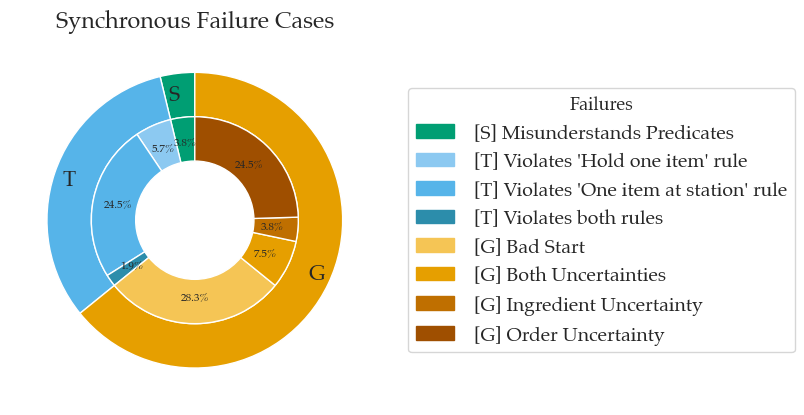

In [3]:
synchronous_piechart_data = {
    'S': {
        'values': [2],
        'subcategories': ['[S] Misunderstands Predicates'],
        'colors': ['#009E73'],
        'subcategory_colors': ['#009E73']  # Single color, same as main category color
    },
    'T': {
        'values': [3, 13, 1],
        'subcategories': ["[T] Violates 'Hold one item' rule", "[T] Violates 'One item at station' rule", '[T] Violates both rules'],
        'colors': ['#56B4E9'],  # Main category color
        'subcategory_colors': ['#8CC9F1', '#56B4E9', '#2C8DAB']  # Different shades
    },
    'G': {
        'values': [15, 4, 2, 13],
        'subcategories': ['[G] Bad Start', '[G] Both Uncertainties', '[G] Ingredient Uncertainty', '[G] Order Uncertainty'],
        'colors': ['#E69F00'],  # Main category color
        'subcategory_colors': ['#F5C555', '#E69F00', '#BF6F00', '#9F4F00']  # Different shades
    }
}

plot_nested_piechart(synchronous_piechart_data, 'Synchronous Failure Cases', "Failures")


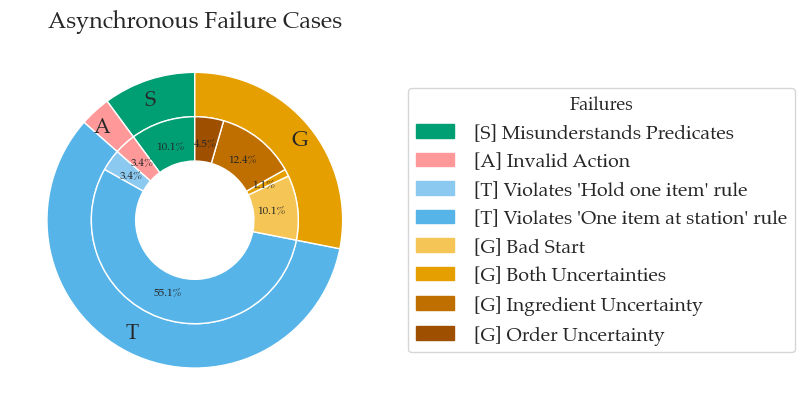

In [4]:
asynchronous_piechart_data = {
    'S': {
        'values': [9],
        'subcategories': ['[S] Misunderstands Predicates'],
        'colors': ['#009E73'],
        'subcategory_colors': ['#009E73']
    },
    'A': {
        'values': [3],
        'subcategories': ['[A] Invalid Action'],
        'colors': ['#ff9999'],
        'subcategory_colors': ['#ff9999']
    },
    'T': {
        'values': [3, 49],
        'subcategories': ["[T] Violates 'Hold one item' rule", "[T] Violates 'One item at station' rule"],
        'colors': ['#56B4E9'],
        'subcategory_colors': ['#8CC9F1', '#56B4E9']
    },
    'G': {
        'values': [9, 1, 11, 4],
        'subcategories': ['[G] Bad Start', '[G] Both Uncertainties', '[G] Ingredient Uncertainty', '[G] Order Uncertainty'],
        'colors': ['#E69F00'],
        'subcategory_colors': ['#F5C555', '#E69F00', '#BF6F00', '#9F4F00']
    }
}

plot_nested_piechart(asynchronous_piechart_data, 'Asynchronous Failure Cases', "Failures")

In [5]:
def plot_nested_piecharts(data1, data2, plot_titles, legend_title):
    # Prepare the outer and inner data for both pie charts
    def prepare_pie_data(data):
        outer_labels = list(data.keys())  # Outer labels are the main groups
        outer_data = [sum(group['values']) for group in data.values()]  # Sum of each group's subcategories
        outer_colors = [group['colors'][0] for group in data.values()]  # First color of each group for the outer layer
        
        # Flatten subcategory labels, values, and colors
        inner_labels = [subcategory for group_data in data.values() for subcategory in group_data['subcategories']]
        inner_data = [value for group_data in data.values() for value in group_data['values']]
        inner_colors = [color for group_data in data.values() for color in group_data['subcategory_colors']]
        
        return outer_labels, outer_data, outer_colors, inner_labels, inner_data, inner_colors
    
    # Prepare the data for both subplots
    outer_labels1, outer_data1, outer_colors1, inner_labels1, inner_data1, inner_colors1 = prepare_pie_data(data1)
    outer_labels2, outer_data2, outer_colors2, inner_labels2, inner_data2, inner_colors2 = prepare_pie_data(data2)
    
    # Create subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns of subplots
    
    # Define a helper function to plot individual nested pie charts
    def plot_pie(ax, outer_labels, outer_data, outer_colors, inner_labels, inner_data, inner_colors, title):
        size = 0.3
        # Outer pie chart (larger donut) with labels but no percentages
        wedges, texts = ax.pie(outer_data, radius=1, labels=outer_labels, colors=outer_colors, 
                               wedgeprops=dict(width=size, edgecolor='w'), startangle=90, labeldistance=0.85)

        # Inner pie chart (smaller donut) with percentages and no labels
        wedges, texts, autotexts = ax.pie(inner_data, radius=1-size, labels=None, colors=inner_colors, 
                                         autopct='%1.1f%%', wedgeprops=dict(width=size, edgecolor='w'), 
                                         startangle=90, labeldistance=None, pctdistance=0.75)
        
        # Adjust the appearance of percentage labels
        for autotext in autotexts:
            autotext.set_fontsize(14)  # Increased text size
            autotext.set_weight('bold')  # Set text weight to bold

        # Add title with larger font size
        ax.set_title(title, fontsize=16)  # Increased title font size
        ax.set(aspect="equal")  # Equal aspect ratio ensures the pie chart is drawn as a circle

        # Calculate the total and place it in the center
        total = sum(outer_data)
        ax.text(0, 0, f'Total: {total}', ha='center', va='center', fontsize=16, weight='bold')  # Increased font size

    # Plot the first pie chart in the first subplot
    plot_pie(axes[0], outer_labels1, outer_data1, outer_colors1, inner_labels1, inner_data1, inner_colors1, plot_titles[0])

    # Plot the second pie chart in the second subplot
    plot_pie(axes[1], outer_labels2, outer_data2, outer_colors2, inner_labels2, inner_data2, inner_colors2, plot_titles[1])

    # Combine all inner labels and colors
    combined_inner_labels = inner_labels1 + inner_labels2
    combined_inner_colors = inner_colors1 + inner_colors2

    # Create a dictionary to ensure unique labels and their corresponding colors
    unique_legend = {label: color for label, color in zip(combined_inner_labels, combined_inner_colors)}
    
    # Create custom legend handles for unique labels
    handles = [mpatches.Patch(color=color) for color in unique_legend.values()]
    
    # Add shared legend outside the plot with unique labels
    fig.legend(handles, unique_legend.keys(), loc='center left', bbox_to_anchor=(1.05, 0.5), title=legend_title, 
               handletextpad=1, fontsize='large', title_fontsize='18')  # Increased legend font size
    
    # Adjust layout so that the subplots and legend do not overlap
    plt.tight_layout()
    
    # Display the plot
    plt.show()


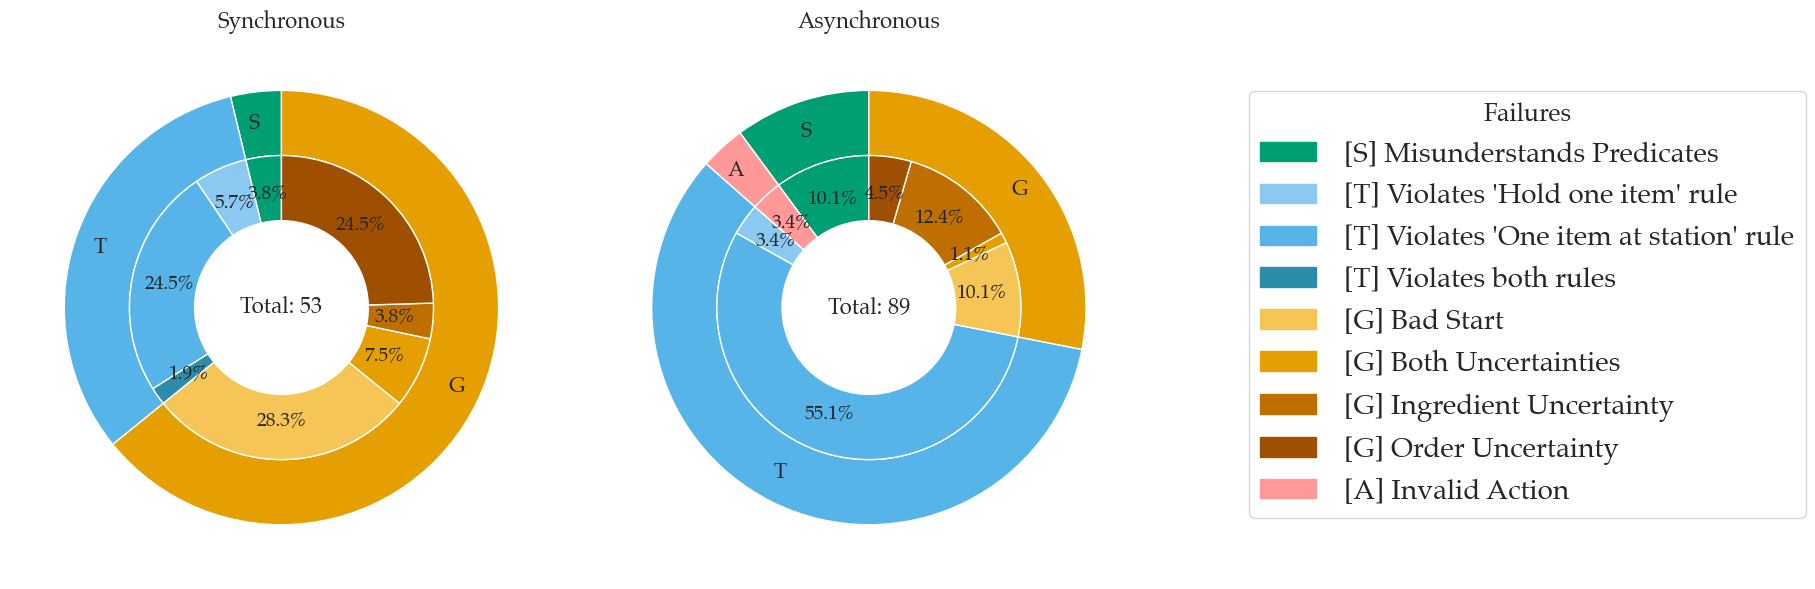

In [6]:
plot_nested_piecharts(synchronous_piechart_data, asynchronous_piechart_data, ['Synchronous', 'Asynchronous'], "Failures")

In [7]:
def plot_repeated_transitions_histogram_plots(data1_successes, data1_failures, data1_label, 
                                    data2_successes, data2_failures, data2_label, 
                                    x_label, bins=None, xtick_increment=1):
    # Set bin_width to 1
    bin_width = 1

    # Calculate bin edges
    if bins is None:
        bin_edges = np.arange(min(min(data1_failures), min(data2_failures)), max(max(data1_failures), max(data2_failures)) + bin_width + 1, bin_width) - 0.5
    else:
        all_data_failures = np.concatenate([data1_failures, data2_failures])
        bin_edges = np.histogram_bin_edges(all_data_failures, bins)

    # Set global font size for the plot
    plt.rcParams.update({'font.size': 14})

    # Create subplots
    fig, axs = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

    # Color-blind friendly colors
    cbf_colors = ['#DC267F', '#785EF0']  # Red (failures) and Purple (successes)

    # Plot stacked histogram for data1
    bars1 = axs[0].hist([data1_failures, data1_successes], bins=bin_edges, alpha=0.7, color=cbf_colors, edgecolor='black', stacked=True)
    axs[0].set_xlabel(x_label, fontsize=18)
    axs[0].set_ylabel('Frequency', fontsize=18)
    axs[0].set_title(data1_label, fontsize=20)

    # Set x-ticks with custom increments for data1
    xticks = np.arange(min(bin_edges) + bin_width / 2, max(bin_edges), xtick_increment)
    axs[0].set_xticks(xticks)
    axs[0].set_xticklabels(xticks.astype(int), fontsize=16)

    # Plot stacked histogram for data2
    bars2 = axs[1].hist([data2_failures, data2_successes], bins=bin_edges, alpha=0.7, color=cbf_colors, edgecolor='black', stacked=True)
    axs[1].set_xlabel(x_label, fontsize=18)
    axs[1].set_title(data2_label, fontsize=20)

    # Set x-ticks with custom increments for data2
    axs[1].set_xticks(xticks)
    axs[1].set_xticklabels(xticks.astype(int), fontsize=16)

    # Add legend
    bar_labels = ['Failures', 'Successes']
    bar_artists1 = [bars1[2][0], bars1[2][1]]  # Extract the bars from the hist output (patches)
    bar_artists2 = [bars2[2][0], bars2[2][1]]

    # Calculate 50% point and mean of each half for failure data only
    half1_data1_failures = data1_failures[:len(data1_failures)//2]
    half2_data1_failures = data1_failures[len(data1_failures)//2:]
    half1_mean_data1_failures = np.mean(half1_data1_failures)
    half2_mean_data1_failures = np.mean(half2_data1_failures)
    mid_point_data1_failures = np.median(data1_failures)

    half1_data2_failures = data2_failures[:len(data2_failures)//2]
    half2_data2_failures = data2_failures[len(data2_failures)//2:]
    half1_mean_data2_failures = np.mean(half1_data2_failures)
    half2_mean_data2_failures = np.mean(half2_data2_failures)
    mid_point_data2_failures = np.median(data2_failures)

    # Plot dashed lines and add annotations for data1 (failures only)
    axs[0].axvline(mid_point_data1_failures, color='black', linestyle='--')
    axs[0].text(mid_point_data1_failures + 0.2, max(axs[0].get_ylim())*0.8, f'{mid_point_data1_failures:.2f}', 
                color='black', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.7))
    axs[0].axvline(half1_mean_data1_failures, color='grey', linestyle='--')
    axs[0].text(half1_mean_data1_failures - 1.6, max(axs[0].get_ylim())*0.7, f'{half1_mean_data1_failures:.2f}', 
                color='grey', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.7))
    axs[0].axvline(half2_mean_data1_failures, color='grey', linestyle='--')
    axs[0].text(half2_mean_data1_failures + 0.2, max(axs[0].get_ylim())*0.6, f'{half2_mean_data1_failures:.2f}', 
                color='grey', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.7))

    # Plot dashed lines and add annotations for data2 (failures only)
    axs[1].axvline(mid_point_data2_failures, color='black', linestyle='--')
    axs[1].text(mid_point_data2_failures + 0.2, max(axs[1].get_ylim())*0.8, f'{mid_point_data2_failures:.2f}', 
                color='black', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.7))
    axs[1].axvline(half1_mean_data2_failures, color='grey', linestyle='--')
    axs[1].text(half1_mean_data2_failures - 1.6, max(axs[1].get_ylim())*0.7, f'{half1_mean_data2_failures:.2f}', 
                color='grey', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.7))
    axs[1].axvline(half2_mean_data2_failures, color='grey', linestyle='--')
    axs[1].text(half2_mean_data2_failures + 0.2, max(axs[1].get_ylim())*0.6, f'{half2_mean_data2_failures:.2f}', 
                color='grey', ha='left', fontsize=16, bbox=dict(facecolor='white', alpha=0.7))

    # Custom dashed lines for the legend
    custom_lines = [Line2D([0], [0], color='black', linestyle='--', lw=2),
                    Line2D([0], [0], color='grey', linestyle='--', lw=2)]
    custom_lines_labels = ['Median (failures)', 'Quartiles (failures)']
    
    # Add dashed lines and bar artists to the legend (for both subplots)
    axs[0].legend(bar_artists1 + custom_lines, bar_labels + custom_lines_labels, loc='upper right', fontsize=14)
    axs[1].legend(bar_artists2 + custom_lines, bar_labels + custom_lines_labels, loc='upper right', fontsize=14)
    
    # Show plot
    plt.tight_layout()
    plt.show()


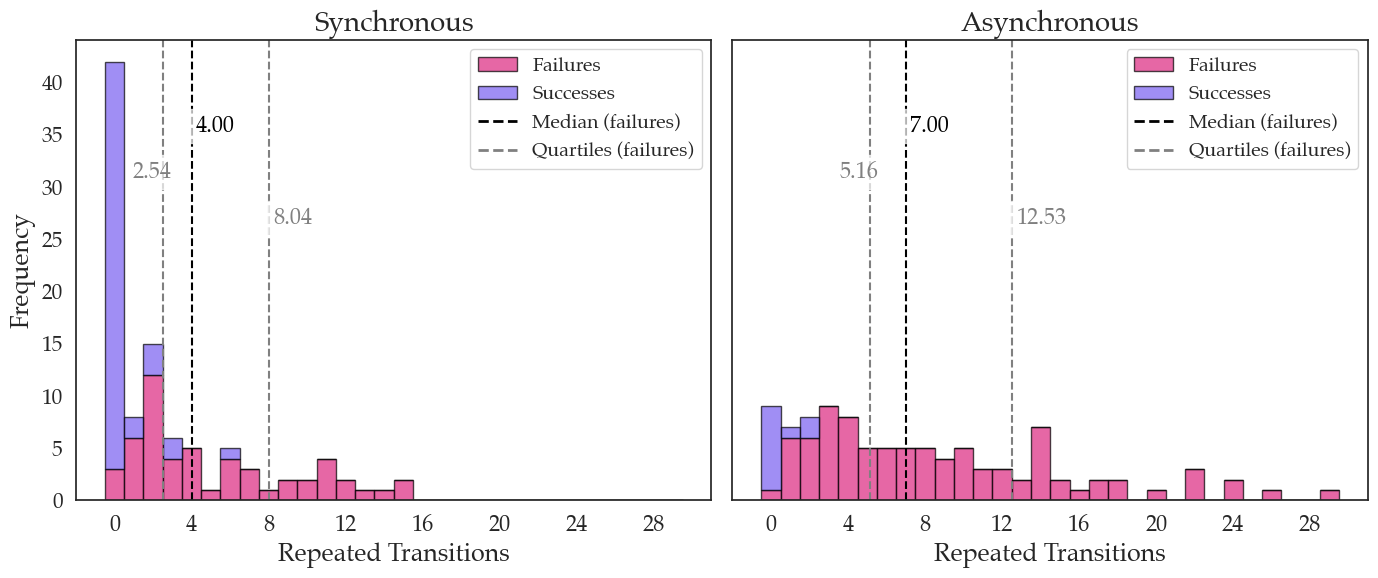

In [8]:
synchronous_success_repeated_actions = [
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
    2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 1, 6, 3,
    0, 0
]
synchronous_failures_repeated_actions = [
    2, 2, 2, 0, 1, 4, 4, 0, 1, 2, 2, 2, 0, 4, 1, 2, 2, 6, 2, 3, 2, 4,
    4, 2, 5, 7, 3, 3, 1, 1, 11, 14, 8, 11, 7, 10, 7, 6, 11, 15, 2, 9,
    10, 15, 13, 12, 6, 9, 1, 6, 3, 12, 11
]
asynchronous_success_repeated_actions = [
    0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 2
]
asynchronous_failures_repeated_actions = [
    3, 4, 5, 4, 3, 8, 2, 4, 3, 5, 1, 7, 1, 10, 3, 2, 2, 4, 9, 1, 6, 4,
    14, 8, 3, 7, 7, 3, 9, 2, 5, 11, 6, 8, 7, 14, 8, 8, 5, 3, 1, 4, 0,
    3, 2, 4, 6, 1, 5, 1, 11, 12, 10, 13, 2, 6, 12, 16, 14, 6, 10, 10,
    11, 7, 3, 14, 9, 4, 18, 15, 15, 22, 17, 17, 14, 22, 12, 22, 14, 10,
    20, 13, 24, 14, 24, 29, 9, 18, 26
]

plot_repeated_transitions_histogram_plots(
    synchronous_success_repeated_actions, synchronous_failures_repeated_actions, 'Synchronous',
    asynchronous_success_repeated_actions, asynchronous_failures_repeated_actions, 'Asynchronous',
    'Repeated Transitions', xtick_increment=4)

In [9]:
def plot_binned_histogram(bins, labels, x_label, data1, title1, colors1, data2, title2, colors2):
    # Ensure the number of labels and colors matches the number of bins - 1
    assert len(labels) == len(bins) - 1, "The number of labels must match the number of bins minus 1."
    assert len(colors1) == len(bins) - 1, "The number of colors for data1 must match the number of bins minus 1."
    assert len(colors2) == len(bins) - 1, "The number of colors for data2 must match the number of bins minus 1."

    # Bin the data
    hist1, _ = np.histogram(data1, bins=bins)
    hist2, _ = np.histogram(data2, bins=bins)

    # Calculate total counts for percentage calculation
    total1 = np.sum(hist1)
    total2 = np.sum(hist2)

    # Calculate percentages
    percent1 = (hist1 / total1) * 100 if total1 > 0 else np.zeros_like(hist1)
    percent2 = (hist2 / total2) * 100 if total2 > 0 else np.zeros_like(hist2)

    # Increase the font size for readability
    plt.rcParams.update({'font.size': 14})  # Global font size adjustment

    # Create subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))  # Two plots side by side with larger figure size

    # Plotting the first histogram (left)
    bars1 = ax1.bar(labels, percent1, color=colors1)  # Plot percentages directly
    ax1.set_xlabel(x_label, fontsize=18)
    ax1.set_ylabel('Percentage (%)', fontsize=18)
    ax1.set_title(title1, fontsize=20)

    # Annotate percentages above bars in the first histogram
    for bar, percent in zip(bars1, percent1):
        ax1.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percent:.1f}%', 
                 ha='center', va='bottom', fontsize=16, fontweight='bold')

    # Plotting the second histogram (right)
    bars2 = ax2.bar(labels, percent2, color=colors2)  # Plot percentages directly
    ax2.set_xlabel(x_label, fontsize=18)
    ax2.set_ylabel('Percentage (%)', fontsize=18)
    ax2.set_title(title2, fontsize=18)

    # Annotate percentages above bars in the second histogram
    for bar, percent in zip(bars2, percent2):
        ax2.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percent:.1f}%', 
                 ha='center', va='bottom', fontsize=16, fontweight='bold')

    # Set the y-axis limits for both subplots
    ax1.set_ylim(0, 100)
    ax2.set_ylim(0, 100)

    plt.tight_layout()
    plt.show()


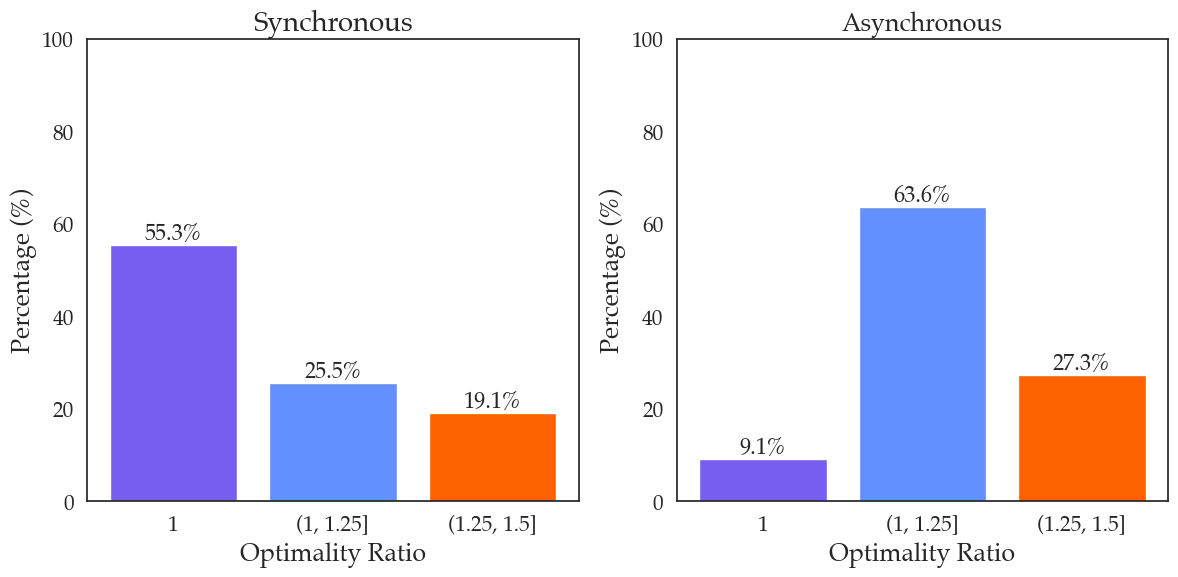

In [10]:
bins = [1, 1.0001, 1.25, 1.5]
labels = ['1', '(1, 1.25]', '(1.25, 1.5]']
synchronous_optimality = [
    1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.00, 1.36,
    1.07, 1.00, 1.00, 1.00, 1.14, 1.08, 1.00, 1.11, 1.00, 1.42,
    1.00, 1.33, 1.38, 1.00, 1.20, 1.20, 1.00, 1.00, 1.17, 1.20,
    1.00, 1.27, 1.00, 1.13, 1.00, 1.00, 1.31, 1.00, 1.07, 1.00,
    1.50, 1.00, 1.21, 1.29, 1.41, 1.00, 1.02
]
asynchronous_optimality = [
    1.29, 1.18, 1.04, 1.20, 1.00, 1.09, 1.14, 1.27, 1.19, 1.05, 1.50
]
plot_binned_histogram(bins, labels, "Optimality Ratio",
    synchronous_optimality, "Synchronous", ['#785EF0', '#648FFF', '#FE6100'],
    asynchronous_optimality, "Asynchronous", ['#785EF0', '#648FFF', '#FE6100']
)

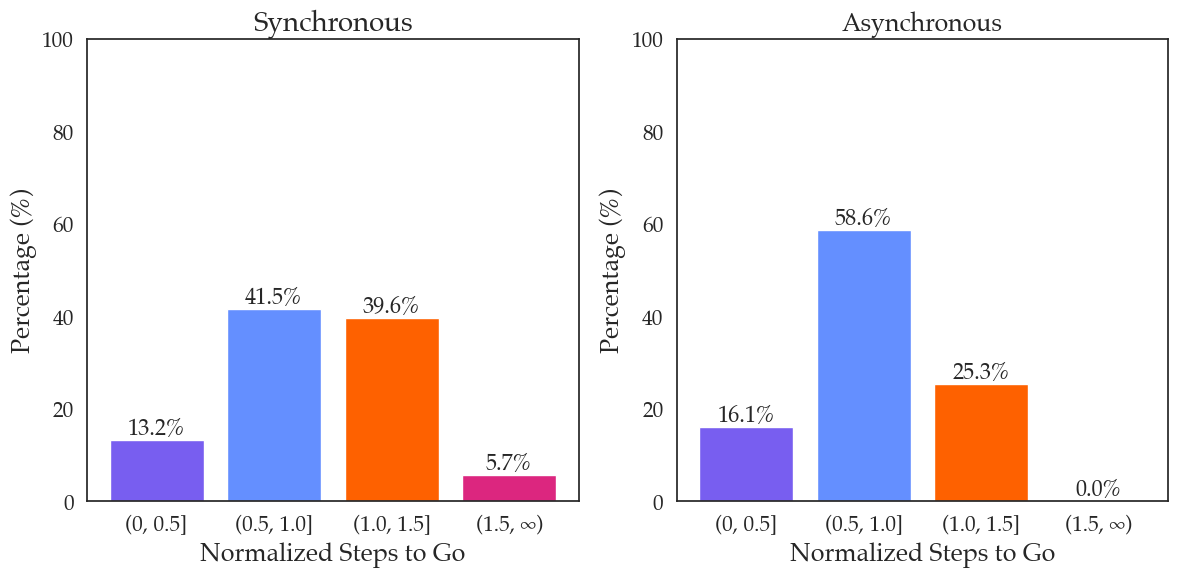

In [11]:
bins = [0.0001, 0.5, 1.0, 1.5, np.inf]
labels = ['(0, 0.5]', '(0.5, 1.0]', '(1.0, 1.5]', '(1.5, ∞)']
synchronous_step_to_go_ratios = [
    1.40, 0.80, 0.40, 0.57, 1.29, 1.08, 0.63, 0.80, 2.20, 2.00, 1.40, 1.20,
    1.30, 1.60, 1.07, 0.93, 1.07, 1.04, 1.04, 0.96, 1.13, 0.96, 1.22, 1.04,
    1.39, 0.03, 1.11, 0.89, 0.78, 1.19, 0.84, 0.93, 0.18, 1.00, 0.55, 1.00,
    0.82, 0.29, 0.89, 0.46, 0.65, 0.41, 1.30, 0.98, 0.63, 0.60, 0.84, 0.56,
    0.61, 1.19, 0.42, 1.28, 0.81
]
asynchronous_step_to_go_ratios = [
    0.67, 0.76, 0.76, 0.95, 1.00, 0.76, 0.76, 1.00, 0.59, 0.63, 0.67, 0.67,
    0.81, 0.67, 1.26, 0.81, 0.92, 0.76, 1.03, 0.59, 0.86, 0.52, 0.64, 1.07,
    0.50, 0.33, 0.62, 0.38, 0.62, 0.69, 0.65, 0.54, 0.50, 0.80, 0.70, 0.78,
    0.35, 0.37, 0.41, 0.98, 0.32, 1.37, 0.05, 1.37, 0.47, 0.16, 1.26, 0.16,
    1.26, 0.36, 0.79, 1.05, 0.93, 0.86, 0.64, 0.86, 1.00, 0.95, 1.12, 0.48,
    0.67, 0.67, 1.02, 0.67, 0.59, 0.89, 1.15, 0.11, 1.20, 0.82, 0.96, 1.04,
    0.72, 0.75, 1.04, 1.22, 0.84, 0.93, 0.90, 0.27, 0.77, 0.68, 1.06, 1.09,
    0.80, 1.02, 1.21
]
plot_binned_histogram(bins, labels, "Normalized Steps to Go",
    synchronous_step_to_go_ratios, "Synchronous", ['#785EF0', '#648FFF', '#FE6100', '#DC267F'],
    asynchronous_step_to_go_ratios, "Asynchronous", ['#785EF0', '#648FFF', '#FE6100', '#DC267F']
)

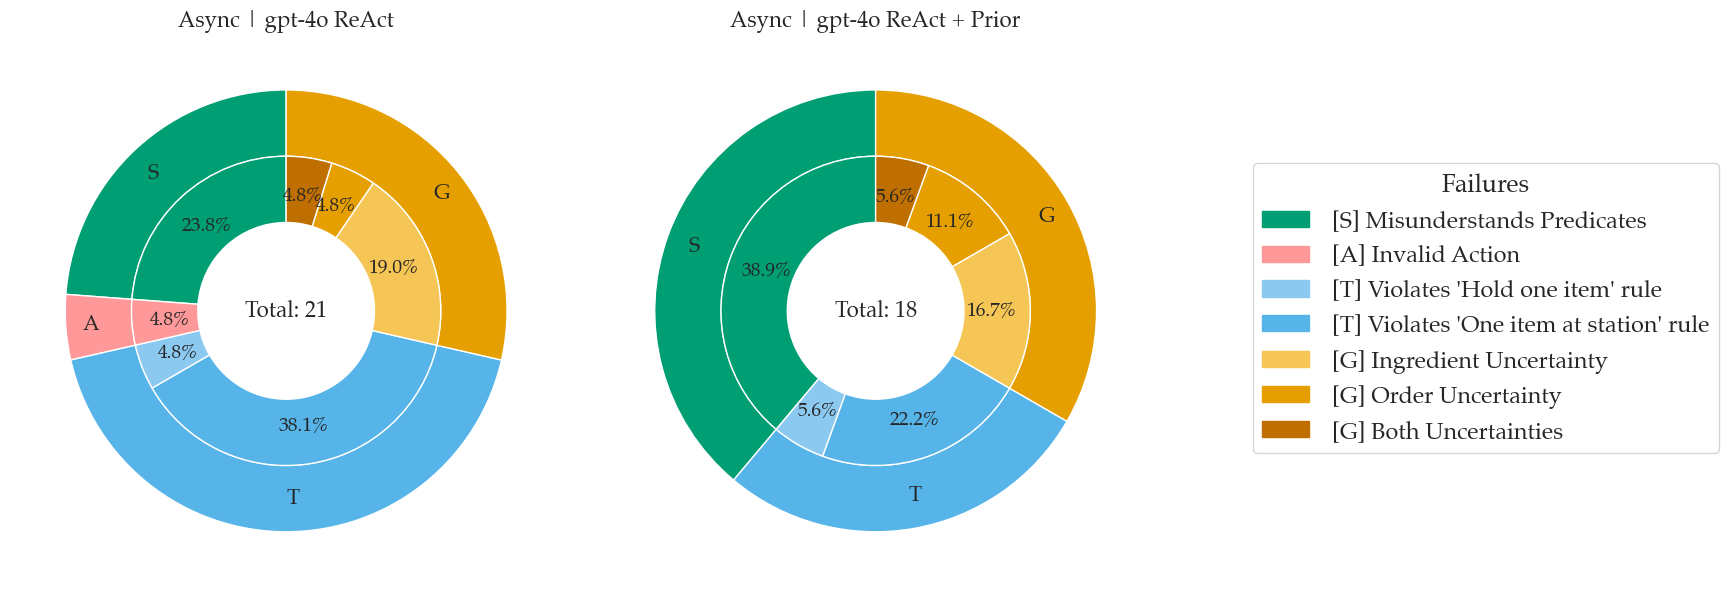

In [12]:
async_before_piechart_data = {
    'S': {
        'values': [5],
        'subcategories': ['[S] Misunderstands Predicates'],
        'colors': ['#009E73'],
        'subcategory_colors': ['#009E73']  # Single color, same as main category color
    },
    'A': {
        'values': [1],
        'subcategories': ["[A] Invalid Action"],
        'colors': ['#ff9999'],  # Main category color
        'subcategory_colors': ['#ff9999']  # Different shades
    },
    'T': {
        'values': [1, 8],
        'subcategories': ["[T] Violates 'Hold one item' rule", "[T] Violates 'One item at station' rule"],
        'colors': ['#56B4E9'],  # Main category color
        'subcategory_colors': ['#8CC9F1', '#56B4E9']  # Different shades
    },
    'G': {
        'values': [4, 1, 1],
        'subcategories': ['[G] Ingredient Uncertainty', '[G] Order Uncertainty', '[G] Both Uncertainties'],
        'colors': ['#E69F00'],  # Main category color
        'subcategory_colors': ['#F5C555', '#E69F00', '#BF6F00']  # Different shades
    }
}

async_after_piechart_data = {
    'S': {
        'values': [7],
        'subcategories': ['[S] Misunderstands Predicates'],
        'colors': ['#009E73'],
        'subcategory_colors': ['#009E73']  # Single color, same as main category color
    },
    'T': {
        'values': [1, 4],
        'subcategories': ["[T] Violates 'Hold one item' rule", "[T] Violates 'One item at station' rule"],
        'colors': ['#56B4E9'],  # Main category color
        'subcategory_colors': ['#8CC9F1', '#56B4E9']  # Different shades
    },
    'G': {
        'values': [3, 2, 1],
        'subcategories': ['[G] Ingredient Uncertainty', '[G] Order Uncertainty', '[G] Both Uncertainties'],
        'colors': ['#E69F00'],  # Main category color
        'subcategory_colors': ['#F5C555', '#E69F00', '#BF6F00']  # Different shades
    }
}
plot_nested_piecharts(async_before_piechart_data, async_after_piechart_data, ['Async | gpt-4o ReAct', 'Async | gpt-4o ReAct + Prior'], "Failures")